In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("C:/Users/Administrator/Desktop/Smart Energy Consumption Forecasting Using Machine Learning/cleaned_preprocessed_energy_data.csv")

In [7]:
print("Shape:", df.shape)
print(df.head())

Shape: (17477, 13)
              datetime  Global_active_power  Global_reactive_power   Voltage  \
0  2006-12-16 17:00:00             1.000000               0.581227  0.173773   
1  2006-12-16 18:00:00             0.873211               0.119906  0.169369   
2  2006-12-16 19:00:00             0.814863               0.136010  0.076239   
3  2006-12-16 20:00:00             0.781744               0.104629  0.134218   
4  2006-12-16 21:00:00             0.728393               0.109480  0.347556   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  hour  \
0          1.000000             0.0        0.019744        0.883552    17   
1          0.885056             0.0        0.251269        0.883843    18   
2          0.819695             0.0        0.053621        0.874236    19   
3          0.784730             0.0        0.000000        0.879476    20   
4          0.732878             0.0        0.015587        0.902183    21   

   day  month  year  day_of_week  
0 

In [13]:
df = df.dropna(subset=[
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
])

print("Shape after dropping missing values:", df.shape)

Shape after dropping missing values: (17415, 13)


In [14]:
features = ['Global_reactive_power', 'Voltage', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
target = 'Global_active_power'

X = df[features]
y = df[target]

print("Missing values in features:", X.isna().sum().sum())
print("Missing values in target:", y.isna().sum())

Missing values in features: 0
Missing values in target: 0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")

Training data: (13932, 6), Testing data: (3483, 6)


In [16]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training completed!")

Model training completed!


In [17]:
y_pred = model.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n MODEL PERFORMANCE")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


 MODEL PERFORMANCE
Mean Absolute Error: 0.0029
Root Mean Squared Error: 0.0044
R² Score: 0.9997


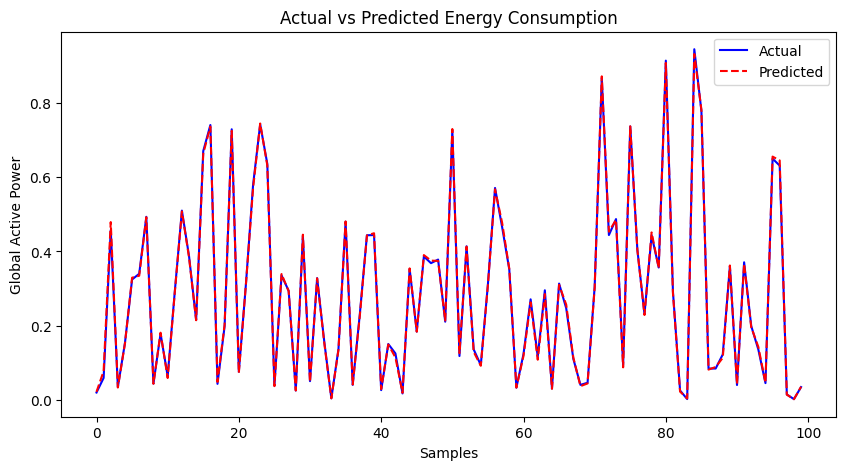

Prediction visualization complete!


In [19]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual", color='blue')
plt.plot(y_pred[:100], label="Predicted", color='red', linestyle='dashed')
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Samples")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()

print("Prediction visualization complete!")